In [1]:
from utils import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import utils
utils.configs.setup()

In [2]:
seed = 42
data = datasets.make_electricity_data("2016-01-01", "2024-01-01", freq="15min", random_state=seed)
print(f"Dataset size: {(data.size / 2**20):.2f} MiB")
display(data)
data.describe()

2024-10-10 10:26:03,325 - INFO - Setting numpy seed to: 42
2024-10-10 10:26:03,440 - INFO - Shape: (280512, 6) | Start: 2016-01-01 00:00:00 | End: 2023-12-31 23:45:00
2024-10-10 10:26:03,441 - INFO - Columns: ['electricity', 'wind_speed', 'wind_speed_no_seasonality', 'daily_seasonality', 'weekly_seasonality', 'yearly_seasonality']


Dataset size: 1.61 MiB


,electricity,wind_speed,wind_speed_no_seasonality,daily_seasonality,weekly_seasonality,yearly_seasonality
time,,,,,,
2016-01-01 00:00:00,6.48,8.10,8.99,0.00,-0.43,0.02
2016-01-01 00:15:00,4.48,6.49,7.72,0.00,-0.43,0.02
2016-01-01 00:30:00,6.55,8.18,9.30,0.00,-0.43,0.02
2016-01-01 00:45:00,12.00,9.82,11.05,0.00,-0.43,0.02
2016-01-01 01:00:00,4.92,7.60,7.53,0.26,-0.43,0.02
...,...,...,...,...,...,...
2023-12-31 22:45:00,2.17,5.04,8.23,-0.50,-0.78,0.00
2023-12-31 23:00:00,3.42,6.32,8.09,-0.26,-0.78,0.00
2023-12-31 23:15:00,6.25,7.95,10.53,-0.26,-0.78,0.00


,electricity,wind_speed,wind_speed_no_seasonality,daily_seasonality,weekly_seasonality,yearly_seasonality
count,280512.00,280512.00,280512.00,280512.00,280512.00,280512.00
mean,8.35,8.04,8.00,-0.00,-0.00,0.00
std,7.31,4.25,2.00,0.71,0.71,0.71
min,0.00,0.00,-0.93,-1.00,-0.97,-1.00
25%,2.48,4.92,6.65,-0.71,-0.78,-0.71
50%,6.43,8.00,8.00,0.00,0.00,0.00
75%,12.30,11.07,9.35,0.71,0.78,0.71
max,58.62,24.18,17.12,1.00,0.97,1.00


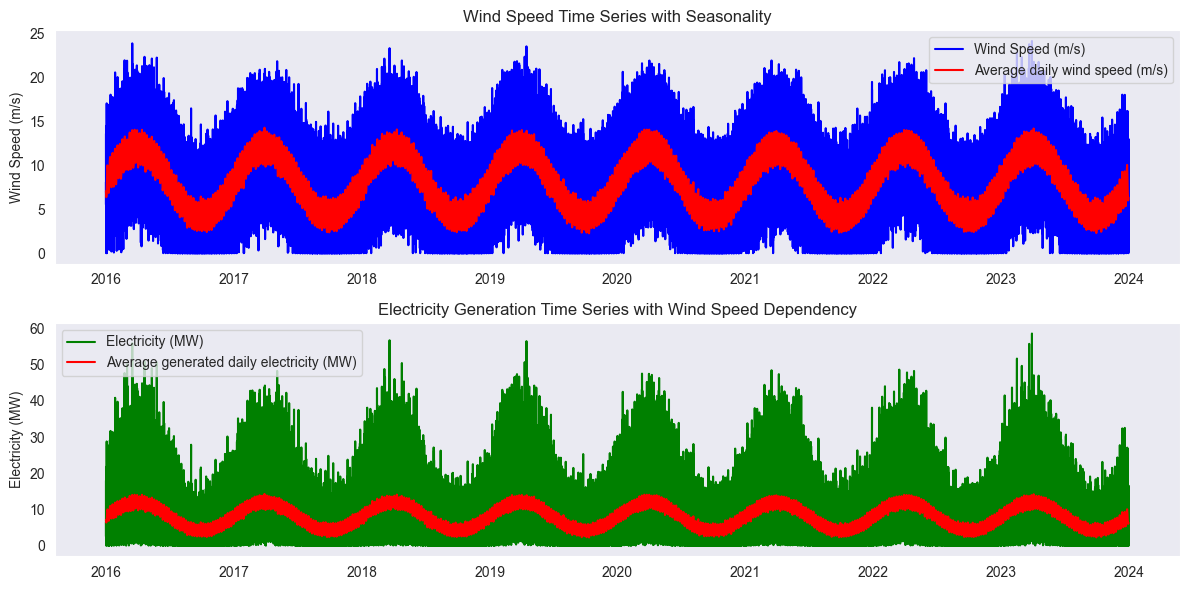

In [3]:
daily_data = data.resample("d").mean()
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data["wind_speed"], label="Wind Speed (m/s)", color="blue")
plt.title("Wind Speed Time Series with Seasonality")
plt.ylabel("Wind Speed (m/s)")
plt.plot(daily_data.index, daily_data.wind_speed, label="Average daily wind speed (m/s)", color="red")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(data.index, data["electricity"], label="Electricity (MW)", color="green")
plt.title("Electricity Generation Time Series with Wind Speed Dependency")
plt.ylabel("Electricity (MW)")
plt.plot(daily_data.index, daily_data.wind_speed, label="Average generated daily electricity (MW)", color="red")
plt.legend()
plt.grid()

plt.tight_layout()


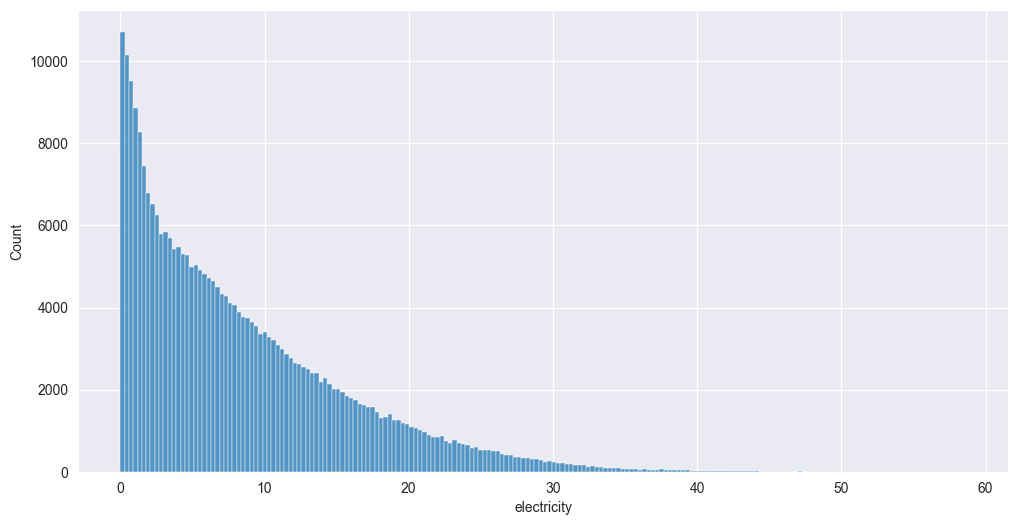

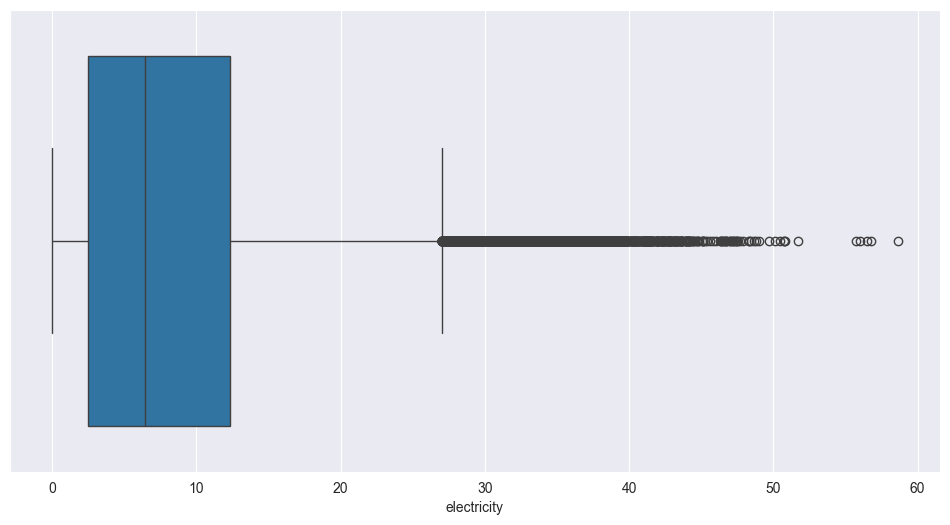

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data, x="electricity");

plt.figure(figsize=(12, 6))
sns.boxplot(data, x="electricity");